Example 1

In [1]:
import monai
from monai.transforms import EnsureChannelFirstd, Compose, LoadImaged, ScaleIntensityRanged

data = [{
    "image": "../demo_data2/imagesTr/case_00000_0000.nii.gz",  # CT图像的路径
    "label": "../demo_data2/labelsTr/case_00000.nii.gz"  # 标签图像的路径
}]

transforms = Compose([
        LoadImaged(keys=["image", "label"]),  # 加载图像和标签
        EnsureChannelFirstd(keys=["image", "label"]),  # 将图像和标签的通道维度放在第一维
        ScaleIntensityRanged(keys=["image"], a_min=-57, a_max=164, b_min=0.0, b_max=1.0, clip=True)
    ])
# 展示transformed_data 和 原图像
image = transforms(data[0])["image"]
label = transforms(data[0])["label"]

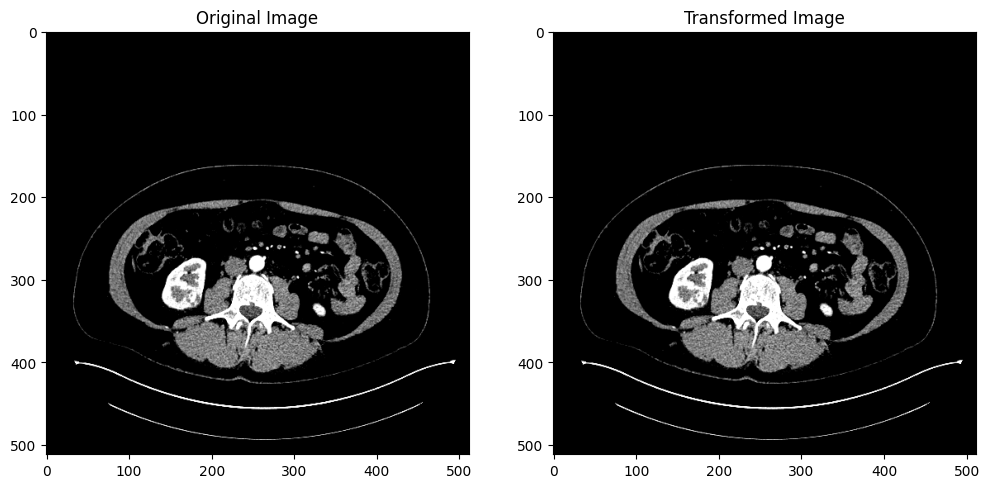

In [3]:
from matplotlib import pyplot as plt

# 使用matplotlib进行图像的可视化
plt.figure("Image", (12, 6))

# 显示原始图像
plt.subplot(1, 2, 1)
plt.title("Original Image")
# 由于加载的图像可能是3D，这里取中间的切片展示
plt.imshow(image[0, image.shape[1] // 2], cmap="gray")

# 显示转换后的图像
plt.subplot(1, 2, 2)
plt.title("Transformed Image")
plt.imshow(image[0, image.shape[1] // 2], cmap="gray")
plt.show()

# 找到a_min和a_max的值 - Train

In [12]:
import glob
import os

directory = "F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019"
if not os.path.exists(directory):
    raise ValueError(f"Directory '{directory}' not found.")
train_images = sorted(glob.glob(os.path.join(directory, "imagesTr_cropped/train", "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(directory, "labelsTr_cropped/train", "*.nii.gz")))
train_data_dicts = [
    {"image": image_name, "label": label_name}
    for image_name, label_name in zip(train_images, train_labels)
]


In [13]:
train_data_dicts

[{'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/train\\case_00000_0000.nii.gz',
  'label': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\labelsTr_cropped/train\\case_00000.nii.gz'},
 {'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/train\\case_00001_0000.nii.gz',
  'label': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\labelsTr_cropped/train\\case_00001.nii.gz'},
 {'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/train\\case_00002_0000.nii.gz',
  'label': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\labelsTr_cropped/train\\case_00002.nii.gz'},
 {'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/train\\case_00003_0000.nii.gz',
  'label': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\labelsTr_cropped/train\\case_00003.nii.gz'},
 {'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/train\\case_00004_0000.nii.gz',
  'label

In [14]:

import monai

transforms2 = Compose([
        LoadImaged(keys=["image", "label"]),  # 加载图像和标签
        EnsureChannelFirstd(keys=["image", "label"]),  # 将图像和标签的通道维度放在第一维
    ])


dataset = monai.data.Dataset(data=train_data_dicts, transform=transforms2)
# 初始化列表以存储强度值
intensities = []
# 遍历数据集
for data in dataset:
    # 获取图像
    image = data["image"]
    # 计算图像的最小值和最大值
    min_intensity = image.min()
    max_intensity = image.max()
    # 将最小值和最大值添加到列表中
    intensities.append((min_intensity, max_intensity))

# 计算全数据集的像素强度的最小值和最大值
min_intensity = min([min_intensity for min_intensity, _ in intensities])
max_intensity = max([max_intensity for _, max_intensity in intensities])



In [15]:
print(f"Min intensity: {min_intensity}")
print(f"Max intensity: {max_intensity}")
# 平均值
print(f"Mean intensity: {sum([min_intensity for min_intensity, _ in intensities]) / len(intensities)}")

Min intensity: -6986.0
Max intensity: 18326.0
Mean intensity: -1106.12353515625


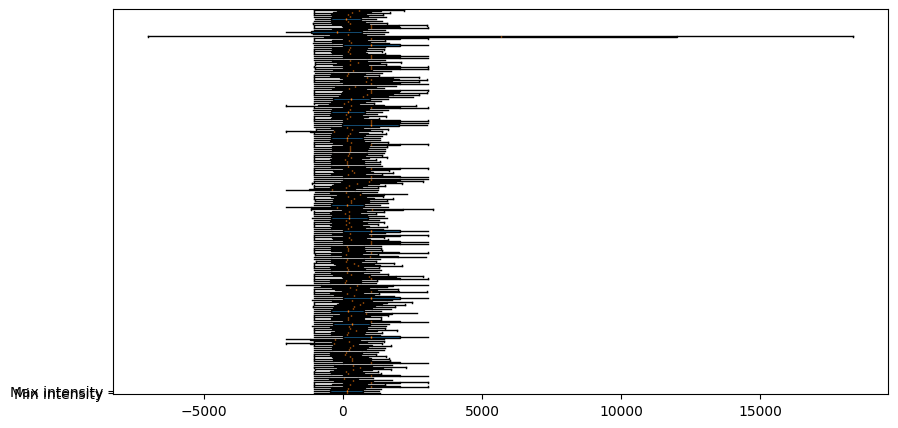

In [16]:
# 制作箱型图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(intensities, vert=False, patch_artist=True)
plt.yticks([1, 2], ["Min intensity", "Max intensity"])
plt.show()


# Val

In [23]:

if not os.path.exists(directory):
    raise ValueError(f"Directory '{directory}' not found.")
val_images = sorted(glob.glob(os.path.join(directory, "imagesTr_cropped/val", "*.nii.gz")))
val_labels = sorted(glob.glob(os.path.join(directory, "labelsTr_cropped/val", "*.nii.gz")))
val_data_dicts = [
    {"image": image_name, "label": label_name}
    for image_name, label_name in zip(val_images, val_labels)
]

In [24]:
val_data_dicts

[{'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/val\\case_00179_0000.nii.gz',
  'label': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\labelsTr_cropped/val\\case_00179.nii.gz'},
 {'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/val\\case_00180_0000.nii.gz',
  'label': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\labelsTr_cropped/val\\case_00180.nii.gz'},
 {'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/val\\case_00181_0000.nii.gz',
  'label': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\labelsTr_cropped/val\\case_00181.nii.gz'},
 {'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/val\\case_00182_0000.nii.gz',
  'label': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\labelsTr_cropped/val\\case_00182.nii.gz'},
 {'image': 'F:/DATASET/nnUNet_raw/Cropped_Dataset220_KiTS2019\\imagesTr_cropped/val\\case_00183_0000.nii.gz',
  'label': 'F:/DATASET/nnU

In [25]:
dataset_val = monai.data.Dataset(data=val_data_dicts, transform=transforms2)
# 初始化列表以存储强度值
intensities_val = []
# 遍历数据集
for data in dataset_val:
    # 获取图像
    image = data["image"]
    # 计算图像的最小值和最大值
    min_intensity = image.min()
    max_intensity = image.max()
    # 将最小值和最大值添加到列表中
    intensities_val.append((min_intensity, max_intensity))

# 计算全数据集的像素强度的最小值和最大值
min_intensity_val = min([min_intensity for min_intensity, _ in intensities_val])
max_intensity_val = max([max_intensity for _, max_intensity in intensities_val])


In [26]:
print(f"Min intensity: {min_intensity_val}")
print(f"Max intensity: {max_intensity_val}")
# 平均值
print(f"Mean intensity: {sum([min_intensity for min_intensity, _ in intensities_val]) / len(intensities_val)}")

Min intensity: -2048.0
Max intensity: 5064.0
Mean intensity: -1288.258056640625


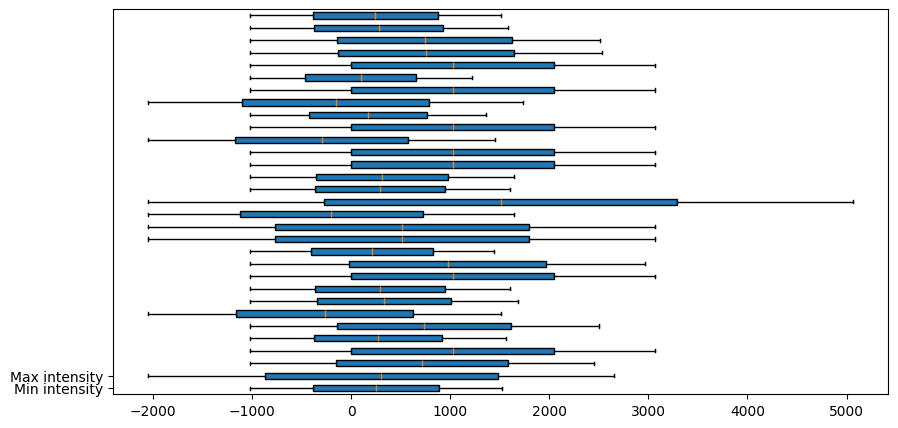

In [27]:
plt.figure(figsize=(10, 5))
plt.boxplot(intensities_val, vert=False, patch_artist=True)
plt.yticks([1, 2], ["Min intensity", "Max intensity"])
plt.show()

In [ ]:
# ScaleIntensityRangePercentiles

